In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# параметры системы

left, right = -6.0, 12.0  # левая и правая граница стержня


def G1(x):
    return 3 * np.pi / 2 if x <= 3 else np.pi / 2


def G2(x):
    return 3 * np.pi / 2 if x >= 3 else np.pi / 2


def f1(u, n, i):
    return 2 * u[n, i]


def f2(u, n, i):
    return np.cos(u[n, i])


# функция, которая применяет к решению начальные условия
def apply_start_conditions(u, x, G):
    for i in range(u.shape[1]):
        u[0, i] = G(x[i])

In [39]:
def get_solution(
        eps: float,
        left: float,
        right: float,
        T: float,
        h: float,
        tau: float,
        apply_start_conditions,
        f,
        G,
):
    x = np.arange(left, right + h, h)  # cетка по пространству
    t = np.arange(0, T + tau, tau)  # cетка по времение
    u = np.zeros((len(t), len(x)))  # пустое решение

    apply_start_conditions(u, x, G)  # применяем начальные условия

    for n in range(0, len(t) - 1):
        for i in range(0, len(x)):
            # используем явную формулу, которые вывели до этого
            u_next = G(10000) if i == len(x) - 1 else u[n, i + 1]
            u_prev = G(-10000) if i == 0 else u[n, i - 1]
            u[n + 1, i] = u[n, i] + tau * (
                    -f(u, n, i) * ((u_next - u_prev) / (2 * h)) +
                    eps * ((u_next - 2 * u[n, i] + u_prev) / h ** 2)
            )

        # u[n + 1, -1] = u[n, -1]
        # u[n + 1, 0] = u[n, 0]

    return u, x

In [64]:
# задаем параметры системы
eps = 1.0
T = 1
h = 0.05
tau = 0.0005
f = f2
G = G1

In [65]:
# решаем систему
u, x = get_solution(
    eps=eps,
    left=left,
    right=right,
    T=T,
    h=h,
    tau=tau,
    apply_start_conditions=apply_start_conditions,
    f=f,
    G=G,
)

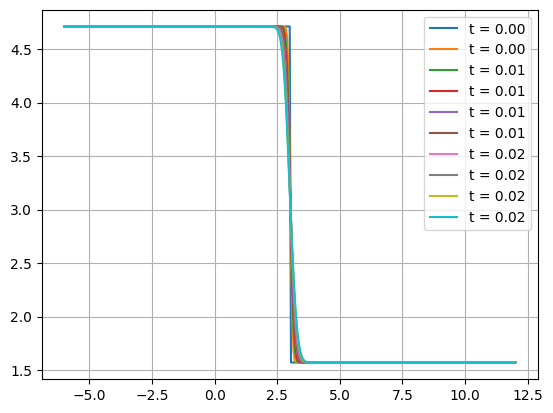

In [66]:
# построение графика для первых нескольких шагов

step_count = len(x)
times_to_plot = np.arange(0, T, T / step_count)
for t in times_to_plot[:10]:
    n = int(t / tau)
    plt.plot(x, u[n, :], label=f't = {t:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# cоздание гифки
image_folder = 'for_gif'
gif_path = 'animation.gif'

In [68]:
def get_f_str(f):
    if f == f1:
        return "f1"
    if f == f2:
        return "f2"
    return "error"


def get_g_str(G):
    if G == G1:
        return "G1"
    if G == G2:
        return "G2"
    return "error"


def create_images_for_gif(image_folder: str):
    # создать графики в папке for_gif
    for t in np.arange(0, 12, 10 * tau):
        try:
            n = int(t / tau)
            plt.plot(x, u[n, :])
            plt.title(f'{eps = }, t = {t:.6f}, {h = }, {tau = }, f = {get_f_str(f)}, G = {get_g_str(G)}')
            plt.grid(True)
            plt.xlabel('x')
            plt.ylabel('u(x)')
            plt.ylim(0, 6)
            plt.savefig(f'{image_folder}/{t:012.6f}.png')
        except Exception:
            continue
        plt.close()

In [69]:
from convection_diffusion_equation.gif import create_gif

create_gif(image_folder, gif_path, create_images_for_gif, step=5, skip_creating=False)

Очищаю папку...
Создаю изображния...
Создаю gif...
Gif cоздано
